## Getting started on synthetic datasets

In [38]:
# import ggml and remaining packages
import ggml_ot
import numpy as np
import seaborn as sns
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

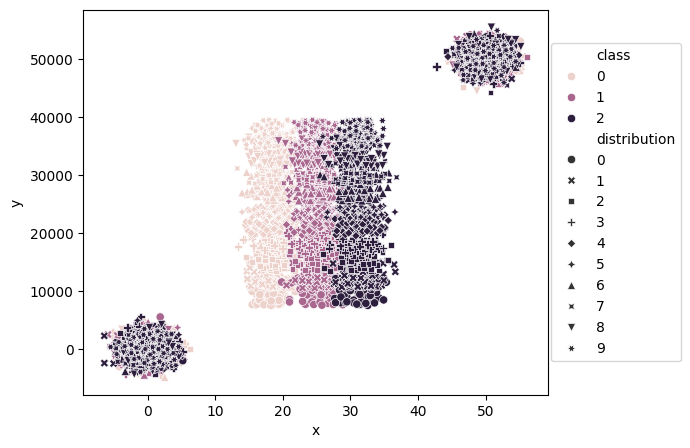

passed neighs: 5


In [39]:
data = ggml_ot.synthetic_Dataset()

In [40]:
# create training dataset that contains the dataset and meta data like the batching information
training_dataset = DataLoader(data, batch_size=128, shuffle=True)

Running GGML with alpha: 10, lambda: 0.1, rank: 5


100%|██████████| 12/12 [00:34<00:00,  2.91s/it]


Iteration 1 with Loss  19625.337890625


100%|██████████| 12/12 [00:34<00:00,  2.84s/it]


Iteration 2 with Loss  12793.3701171875


100%|██████████| 12/12 [00:33<00:00,  2.83s/it]


Iteration 3 with Loss  6409.91455078125


100%|██████████| 12/12 [00:33<00:00,  2.75s/it]


Iteration 4 with Loss  1621.868408203125


100%|██████████| 12/12 [00:32<00:00,  2.72s/it]


Iteration 5 with Loss  310.7851257324219


100%|██████████| 12/12 [00:32<00:00,  2.70s/it]


Iteration 6 with Loss  302.8205871582031


100%|██████████| 12/12 [00:32<00:00,  2.69s/it]


Iteration 7 with Loss  292.1875915527344


100%|██████████| 12/12 [00:32<00:00,  2.70s/it]


Iteration 8 with Loss  327.9909973144531


100%|██████████| 12/12 [00:32<00:00,  2.68s/it]


Iteration 9 with Loss  298.7831726074219


100%|██████████| 12/12 [00:32<00:00,  2.68s/it]


Iteration 10 with Loss  299.7369384765625


100%|██████████| 12/12 [00:32<00:00,  2.68s/it]


Iteration 11 with Loss  311.9202880859375


100%|██████████| 12/12 [00:32<00:00,  2.67s/it]


Iteration 12 with Loss  286.30780029296875


100%|██████████| 12/12 [00:31<00:00,  2.66s/it]


Iteration 13 with Loss  296.14190673828125


100%|██████████| 12/12 [00:32<00:00,  2.67s/it]


Iteration 14 with Loss  298.3895568847656


100%|██████████| 12/12 [00:31<00:00,  2.67s/it]


Iteration 15 with Loss  279.3951721191406


100%|██████████| 12/12 [00:32<00:00,  2.71s/it]


Iteration 16 with Loss  325.565185546875


100%|██████████| 12/12 [00:31<00:00,  2.66s/it]


Iteration 17 with Loss  307.9256591796875


100%|██████████| 12/12 [00:31<00:00,  2.64s/it]


Iteration 18 with Loss  256.03009033203125


100%|██████████| 12/12 [00:31<00:00,  2.65s/it]


Iteration 19 with Loss  230.11305236816406


100%|██████████| 12/12 [00:31<00:00,  2.65s/it]


Iteration 20 with Loss  294.81390380859375
Compute all OT distances after 20 iterations


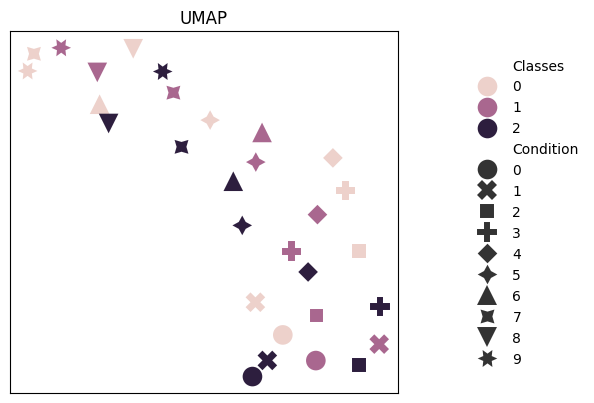

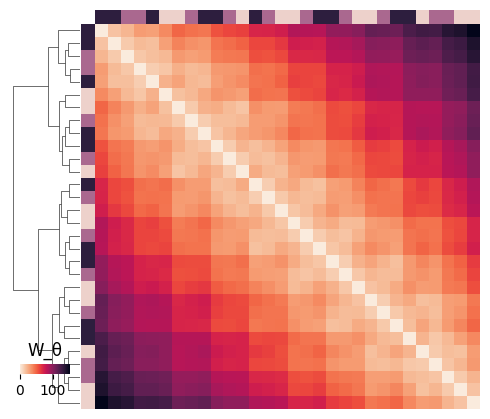

In [41]:
# train the model
# --> learns the global ground metric on the given dataset
w_theta = ggml_ot.ggml(training_dataset,lr=0.02,max_iterations=20,plot_i_iterations=20,dataset=data)

## Plotting functions

### Plotting the distributions:

- mandatory inputs: 
  - a list of distributions
  - corresponding labels
- optional inputs:
  - projection: function to apply to the distributions before plotting if desired
  - title: title of the plot
  - legend: whether a legend should be added

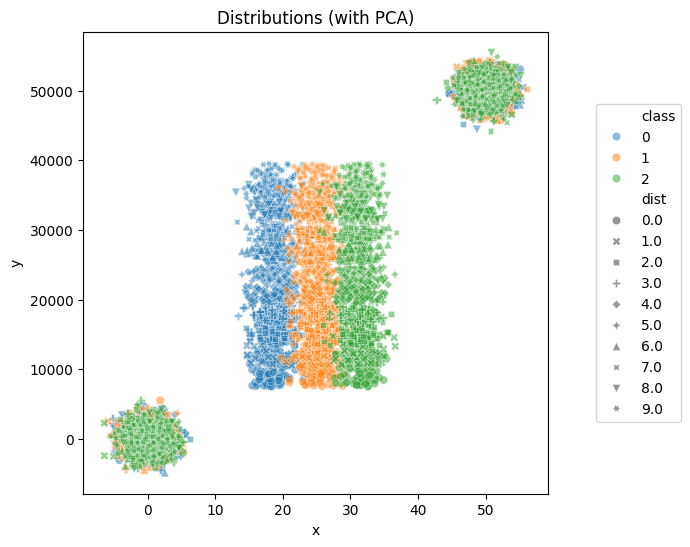

In [42]:
# plot distributions using PCA
a = data.distributions
b = data.distributions_labels
ggml_ot.plot_distribution(a, b, title = "Distributions (with PCA)", legend = True)
plt.show()

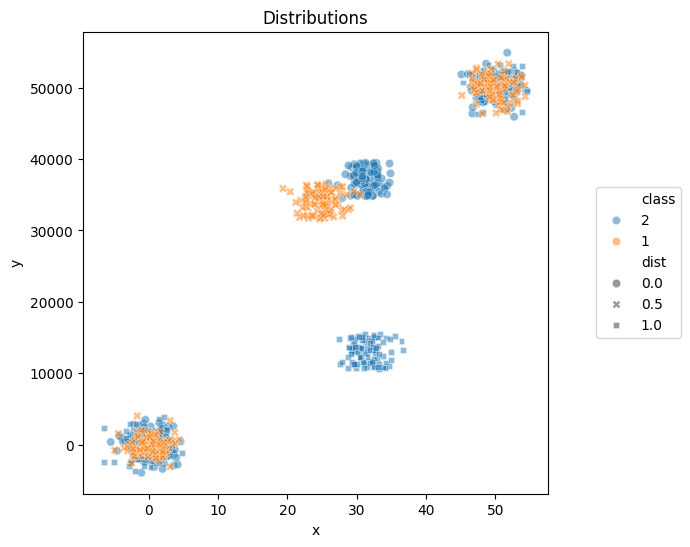

In [43]:
train_features, train_labels = next(iter(training_dataset))
trpl_distributions = train_features[0]
trpl_label = train_labels[0]
ggml_ot.plot_distribution(trpl_distributions[:,:,:2],np.asarray(trpl_label,dtype=int))

plt.show()

### Plotting the ellipses to covariance matrices
- mandatory inputs:
  - a list of covariance matrices
- optional inputs:
  - ax: ax object on which to plot the ellipses
  - title: title of the plot

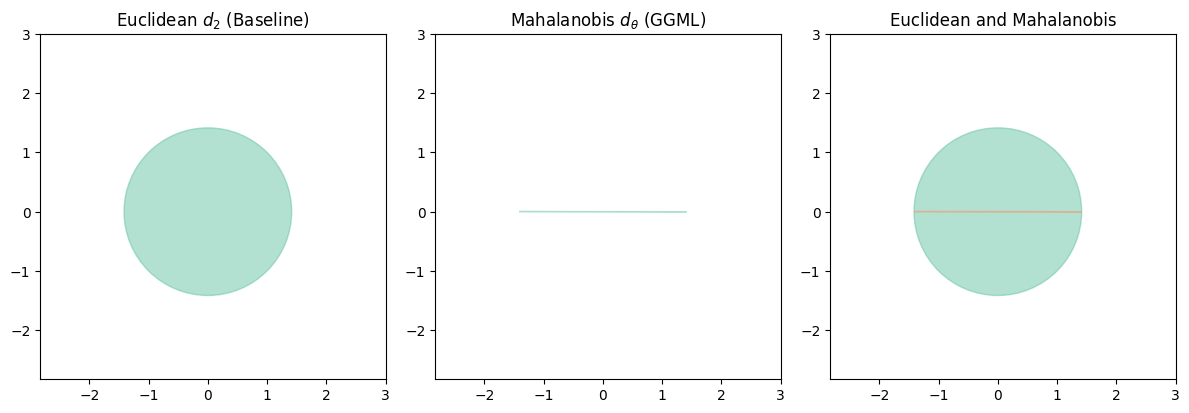

In [44]:
np.set_printoptions(suppress=True,precision=16)

fig, axs = plt.subplots(ncols=3, figsize=(12, 6))

# plot no.1: Euclidean distance (identity matrix as covariance)
ax = ggml_ot.plot_ellipses(np.identity(2), ax=axs[0])
ax.set_title(r'Euclidean $d_2$ (Baseline)')

# plot no.2: Mahalanobis distance (based on w_theta)
m = np.transpose(w_theta) @ w_theta  # Mahalanobis matrix
ax = ggml_ot.plot_ellipses(m[:2, :2], ax=axs[1])
ax.set_title(r'Mahalanobis $d_\theta$ (GGML)')

# plot no.3: Euclidean and Mahalanobis distances
ax = ggml_ot.plot_ellipses([np.identity(2), m[:2, :2]], ax=axs[2])
ax.set_title(r'Euclidean and Mahalanobis')

plt.tight_layout()
plt.show()

### Plotting data as color-encoded matrix (heatmap)
- mandatory inputs:
  - data to plot
- optional inputs:
  - labels: labels of the data
  - xlabels: labels for x axis
  - ylabels: labels for y axis
  - ax: axes object on which to plot the heatmap
  - title: title of the plot

In [45]:
# get the optimal transport distances using w_theta
D_ggml = data.compute_OT_on_dists(w = w_theta, plot = False)

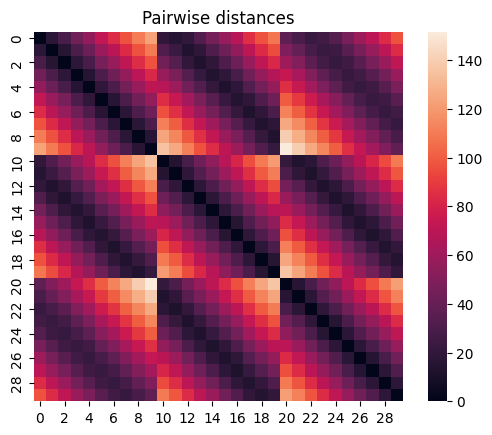

In [46]:
ggml_ot.plot_heatmap(D_ggml)

### Plotting embeddings of distance matrices
- mandatory inputs:
  - distance matrix
- optional inputs:
  - method: dimensionality reduction method
  - precomputed embedding: embedding to plot instead of embedding of distance matrix
  - colors: class labels to use for coloring the points
  - symbols: labels to use for marker styles
  - ax: axes on which to draw the embedding
  - Cluster_ID: indication whether a point is a centroid/ medoid/ representative point of a cluster that is displayed larger
  - title: title of the plot
  - cmap: colormap to use for coloring the points
  - save_path: path to save the plot
  - verbose: whether to display title of plot
  - legend: where to place the legend
  - s: marker size
  - hue_order: order in which class labels should be displayed in legend
  - annotation: text to display on each point
  - linewidth: linewidth of marker edges
  - annotation_image_path: image paths to overlay on plot


/rwthfs/rz/cluster/home/ja205610/ggml-ot/src/ggml_ot/plot/plotting.py:343: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.scatterplot(


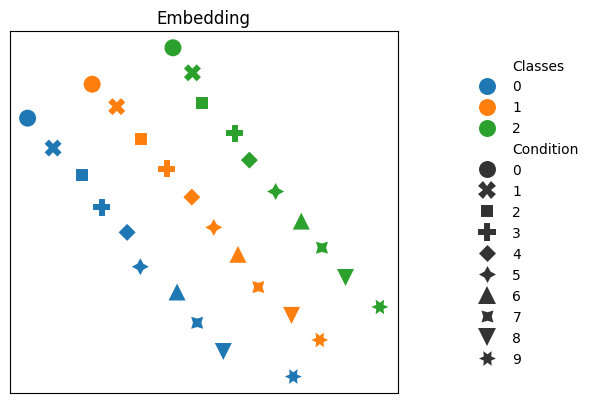

In [47]:
symbols = [i % 10 for i in range(len(data.distributions))]
colors = data.distributions_labels

emb = ggml_ot.plot_emb(D_ggml, method = "mds", symbols = symbols, colors = colors, verbose = True, cmap=sns.color_palette("tab10"), s = 150, legend = "Side")

### Plotting a matrix dataset as a hierarchically-clustered heatmap (clustermap)
- mandatory inputs:
  - distance matrix
  - labels
- optional inputs:
  - cluster: whether to apply hierarchical clustering
  - method: linkage method
  - title: title of the clustermap
  - log: whether to apply logarithmic scaling
  - save_path: whether/ where to save the plot to
  - cmap: color palette for class labels
  - hue_order: ordering of class labels
  - annotation: whether to display sample labels


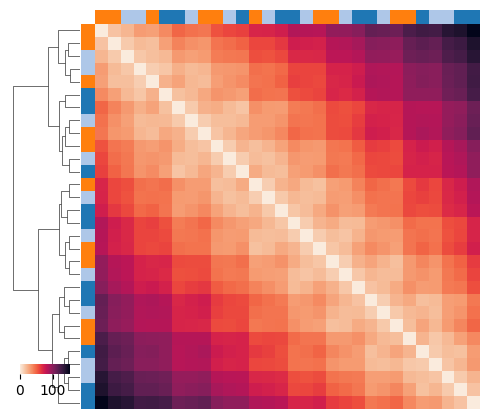

In [48]:
linkage = ggml_ot.plot_clustermap(D_ggml, data.distributions_labels)